Football Predictions

In [119]:
import numpy as np #for data processing
import pandas as pd #linear algebra
import seaborn as sns #to visualise data
import matplotlib as mpl

import the datasets and conduct data analysis

In [120]:
standings_df = pd.read_csv("2023_PL_standings.csv")
results_df = pd.read_csv("2023_matchday_results.csv",parse_dates=['fixture.date'])
home_df = pd.read_csv("2023_home_teams_stats.csv")
away_df = pd.read_csv("2023_away_teams_stats.csv")

In [121]:
home_df.head()


,fixture id,Home team id,Home team name,Shots on Goal,Shots off Goal,Total Shots,Blocked Shots,Shots insidebox,Shots outsidebox,Fouls,Corner Kicks,Offsides,Ball Possession,Yellow Cards,Red Cards,Goalkeeper Saves,Total passes,Passes accurate,Passes %,expected_goals
0,867946,52,Crystal Palace,2.0,2.0,10,6.0,9.0,1.0,16,3.0,1.0,56%,1.0,NaN,1.0,562,487,87%,NaN
1,867947,36,Fulham,3.0,2.0,9,4.0,7.0,2.0,7,4.0,4.0,33%,2.0,NaN,1.0,294,181,62%,NaN
2,867948,35,Bournemouth,3.0,2.0,7,2.0,6.0,1.0,18,5.0,1.0,34%,3.0,NaN,2.0,301,211,70%,NaN
3,867949,63,Leeds,4.0,5.0,12,3.0,7.0,5.0,13,6.0,NaN,40%,2.0,NaN,5.0,355,269,76%,NaN
4,867950,46,Leicester,5.0,6.0,14,3.0,5.0,9.0,6,5.0,2.0,55%,NaN,NaN,1.0,580,510,88%,NaN


In [122]:
away_df.head()

,fixture id,away team id,away team name,Shots on Goal,Shots off Goal,Total Shots,Blocked Shots,Shots insidebox,Shots outsidebox,Fouls,Corner Kicks,Offsides,Ball Possession,Yellow Cards,Red Cards,Goalkeeper Saves,Total passes,Passes accurate,Passes %,expected_goals
0,867946,42.0,Arsenal,2.0,4.0,10,4.0,8.0,2.0,11,5.0,2.0,44%,2.0,NaN,2.0,438,360,82%,NaN
1,867947,40.0,Liverpool,4.0,5.0,11,2.0,9.0,2.0,9,4.0,4.0,67%,NaN,NaN,1.0,612,473,77%,NaN
2,867948,66.0,Aston Villa,2.0,7.0,15,6.0,4.0,11.0,16,5.0,4.0,66%,3.0,NaN,1.0,571,479,84%,NaN
3,867949,39.0,Wolves,6.0,6.0,15,3.0,8.0,7.0,9,4.0,1.0,60%,NaN,NaN,3.0,546,463,85%,NaN
4,867950,55.0,Brentford,3.0,4.0,8,1.0,5.0,3.0,5,6.0,2.0,45%,NaN,NaN,3.0,457,386,84%,NaN


In [123]:
results_df.head()

,Unnamed: 0,fixture.id,fixture.date,teams.home.id,teams.home.name,teams.home.winner,teams.away.id,teams.away.name,teams.away.winner,goals.home,goals.away
0,0,867946,2022-08-05 19:00:00+00:00,52,Crystal Palace,False,42,Arsenal,True,0,2
1,1,867947,2022-08-06 11:30:00+00:00,36,Fulham,NaN,40,Liverpool,NaN,2,2
2,2,867948,2022-08-06 14:00:00+00:00,35,Bournemouth,True,66,Aston Villa,False,2,0
3,3,867949,2022-08-06 14:00:00+00:00,63,Leeds,True,39,Wolves,False,2,1
4,4,867950,2022-08-07 13:00:00+00:00,46,Leicester,NaN,55,Brentford,NaN,2,2


In [124]:
standings_df.head()

,rank,points,goalsDiff,team_id,team.name,matches_played,wins,draws,losses,goals_for,...,home_draw,home_lose,home_goals_for,home_goals_against,away,away_wins,away_draw,away_lose,away_goals_for,away_goals_against
0,1,89,61,50,Manchester City,38,28,5,5,94,...,1,1,60,17,19,11,4,4,34,16
1,2,84,45,42,Arsenal,38,26,6,6,88,...,3,2,53,25,19,12,3,4,35,18
2,3,75,15,33,Manchester United,38,23,6,9,58,...,3,1,36,10,19,8,3,8,22,33
3,4,71,35,34,Newcastle,38,19,14,5,68,...,6,2,36,14,19,8,8,3,32,19
4,5,67,28,40,Liverpool,38,19,10,9,75,...,5,1,46,17,19,6,5,8,29,30


In [125]:
home_df.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fixture id        380 non-null    int64  
 1   Home team id      380 non-null    int64  
 2   Home team name    380 non-null    object 
 3   Shots on Goal     374 non-null    float64
 4   Shots off Goal    376 non-null    float64
 5   Total Shots       380 non-null    int64  
 6   Blocked Shots     364 non-null    float64
 7   Shots insidebox   379 non-null    float64
 8   Shots outsidebox  376 non-null    float64
 9   Fouls             380 non-null    int64  
 10  Corner Kicks      374 non-null    float64
 11  Offsides          303 non-null    float64
 12  Ball Possession   380 non-null    object 
 13  Yellow Cards      306 non-null    float64
 14  Red Cards         18 non-null     float64
 15  Goalkeeper Saves  338 non-null    float64
 16  Total passes      380 non-null    int64  
 1

In [126]:
away_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fixture id        380 non-null    int64  
 1   away team id      380 non-null    float64
 2   away team name    380 non-null    object 
 3   Shots on Goal     364 non-null    float64
 4   Shots off Goal    367 non-null    float64
 5   Total Shots       380 non-null    int64  
 6   Blocked Shots     353 non-null    float64
 7   Shots insidebox   379 non-null    float64
 8   Shots outsidebox  361 non-null    float64
 9   Fouls             380 non-null    int64  
 10  Corner Kicks      373 non-null    float64
 11  Offsides          291 non-null    float64
 12  Ball Possession   380 non-null    object 
 13  Yellow Cards      327 non-null    float64
 14  Red Cards         10 non-null     float64
 15  Goalkeeper Saves  356 non-null    float64
 16  Total passes      380 non-null    int64  
 1

In [127]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   Unnamed: 0         380 non-null    int64              
 1   fixture.id         380 non-null    int64              
 2   fixture.date       380 non-null    datetime64[ns, UTC]
 3   teams.home.id      380 non-null    int64              
 4   teams.home.name    380 non-null    object             
 5   teams.home.winner  293 non-null    object             
 6   teams.away.id      380 non-null    int64              
 7   teams.away.name    380 non-null    object             
 8   teams.away.winner  293 non-null    object             
 9   goals.home         380 non-null    int64              
 10  goals.away         380 non-null    int64              
dtypes: datetime64[ns, UTC](1), int64(6), object(4)
memory usage: 32.8+ KB


In [128]:
standings_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   rank                20 non-null     int64 
 1   points              20 non-null     int64 
 2   goalsDiff           20 non-null     int64 
 3   team_id             20 non-null     int64 
 4   team.name           20 non-null     object
 5   matches_played      20 non-null     int64 
 6   wins                20 non-null     int64 
 7   draws               20 non-null     int64 
 8   losses              20 non-null     int64 
 9   goals_for           20 non-null     int64 
 10  goals_against       20 non-null     int64 
 11  home                20 non-null     int64 
 12  home_wins           20 non-null     int64 
 13  home_draw           20 non-null     int64 
 14  home_lose           20 non-null     int64 
 15  home_goals_for      20 non-null     int64 
 16  home_goals_against  20 non-n

Observation 1:

Based off of getting datasets information, we observe:
- Standings Dataset has no missing value; it has one caegorical column.
- results Dataset has 87 null values on 2 columns.
- Away dataset has missing values
- Home dataset has missing values as well.

Dealing with Result dataset

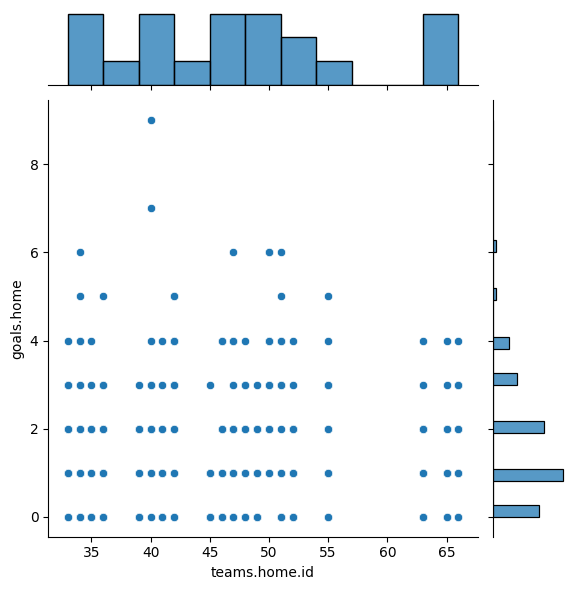

In [129]:
sns.jointplot(x='teams.home.id', y='goals.home', data=results_df)

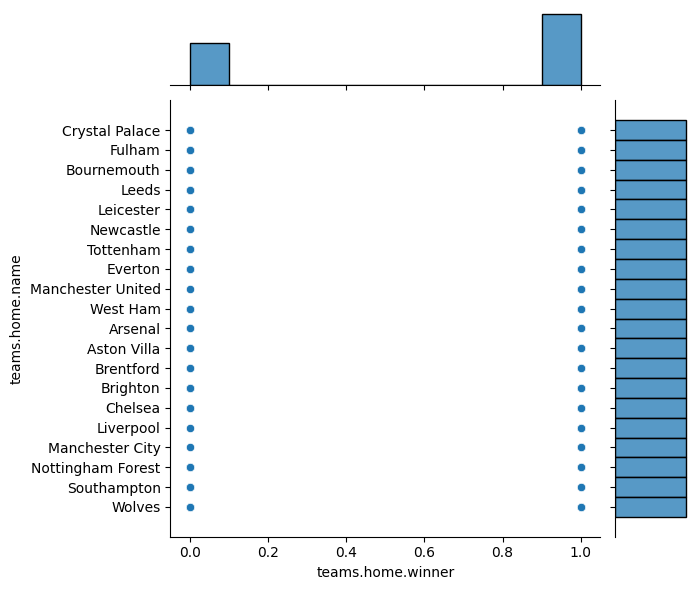

In [130]:
sns.jointplot(x='teams.home.winner', y='teams.home.name', data=results_df)

<Axes: xlabel='teams.home.winner', ylabel='count'>

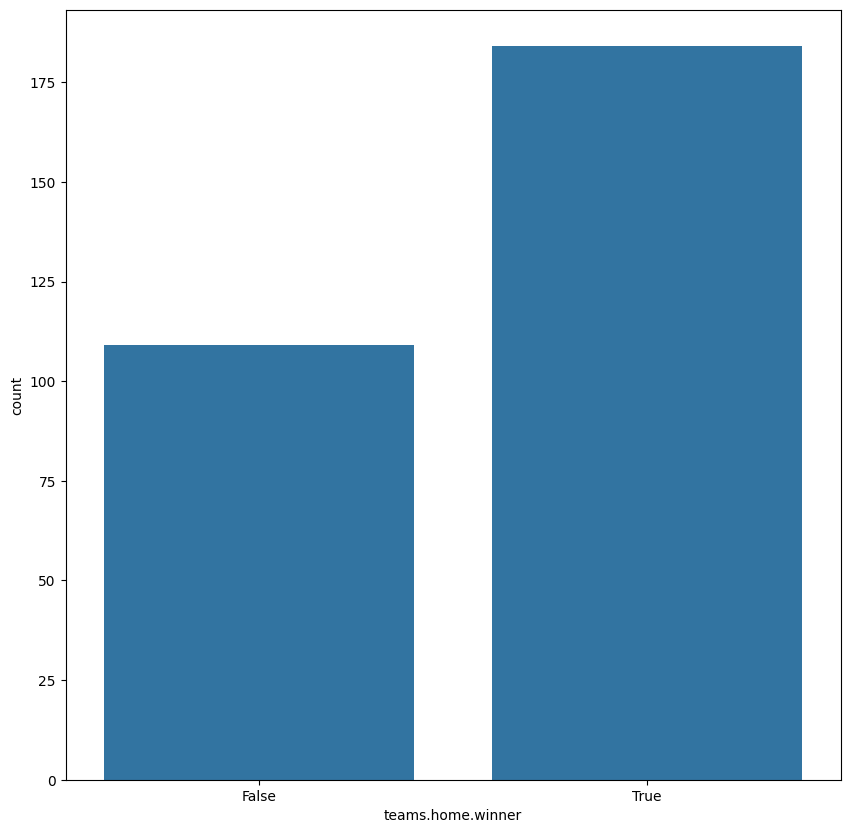

In [131]:
sns.countplot(x="teams.home.winner", data=results_df)

In [132]:
results_df.columns

Index(['Unnamed: 0', 'fixture.id', 'fixture.date', 'teams.home.id',
       'teams.home.name', 'teams.home.winner', 'teams.away.id',
       'teams.away.name', 'teams.away.winner', 'goals.home', 'goals.away'],
      dtype='object')

based on observable information, we do not need team name, we will drop these columns


In [133]:
results_df = results_df.drop(columns=['Unnamed: 0', 'teams.home.name','teams.away.name'])

In [134]:
#create another column called date, this wil extract date from fixture date column and assign it to the date column
results_df['date'] = results_df['fixture.date'].apply(lambda x: x.date())
results_df['date']=pd.to_datetime(results_df['date'])



We will be performing Ordinal encoding to deal with the missing values on the team.home.winner column
we will do this by creating a column called "full time", which maps null or NaN value to Draw instead.


In [135]:
conditions = [
    (results_df['teams.home.winner'] == True),
    (results_df['teams.home.winner'] == False),
    (results_df['teams.home.winner'].isnull())
    ]
# create a list of the values we want to assign for each condition
values = ['home', 'away', 'draw']

results_df['full_time'] = np.select(conditions, values)

In [136]:
#check our result dataset
results_df.head()

,fixture.id,fixture.date,teams.home.id,teams.home.winner,teams.away.id,teams.away.winner,goals.home,goals.away,date,full_time
0,867946,2022-08-05 19:00:00+00:00,52,False,42,True,0,2,2022-08-05,away
1,867947,2022-08-06 11:30:00+00:00,36,NaN,40,NaN,2,2,2022-08-06,draw
2,867948,2022-08-06 14:00:00+00:00,35,True,66,False,2,0,2022-08-06,home
3,867949,2022-08-06 14:00:00+00:00,63,True,39,False,2,1,2022-08-06,home
4,867950,2022-08-07 13:00:00+00:00,46,NaN,55,NaN,2,2,2022-08-07,draw


Since we have created a column "Full time", this eliminates the need for the "teams.home.winner" and "teams.away.winner", these columns will be dropped to eliminate redundancy.
we will rename fixture ID column 

In [137]:
results_df = results_df.drop(columns=['teams.home.winner','teams.away.winner'])
results_df = results_df.rename(columns={'fixture.id':'fixture id'})

In [138]:
results_df.head()

,fixture id,fixture.date,teams.home.id,teams.away.id,goals.home,goals.away,date,full_time
0,867946,2022-08-05 19:00:00+00:00,52,42,0,2,2022-08-05,away
1,867947,2022-08-06 11:30:00+00:00,36,40,2,2,2022-08-06,draw
2,867948,2022-08-06 14:00:00+00:00,35,66,2,0,2022-08-06,home
3,867949,2022-08-06 14:00:00+00:00,63,39,2,1,2022-08-06,home
4,867950,2022-08-07 13:00:00+00:00,46,55,2,2,2022-08-07,draw


In [139]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   fixture id     380 non-null    int64              
 1   fixture.date   380 non-null    datetime64[ns, UTC]
 2   teams.home.id  380 non-null    int64              
 3   teams.away.id  380 non-null    int64              
 4   goals.home     380 non-null    int64              
 5   goals.away     380 non-null    int64              
 6   date           380 non-null    datetime64[ns]     
 7   full_time      380 non-null    object             
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), int64(5), object(1)
memory usage: 23.9+ KB


Conclusion on Result dataset:
Based on the EDA ran, our data has now been cleaned 😁

PHASE 2:
Merging our Home and away Dataset

In [140]:
home_df.columns

Index(['fixture id', 'Home team id', 'Home team name', 'Shots on Goal',
       'Shots off Goal', 'Total Shots', 'Blocked Shots', 'Shots insidebox',
       'Shots outsidebox', 'Fouls', 'Corner Kicks', 'Offsides',
       'Ball Possession', 'Yellow Cards', 'Red Cards', 'Goalkeeper Saves',
       'Total passes', 'Passes accurate', 'Passes %', 'expected_goals'],
      dtype='object')

In [141]:
away_df.columns

Index(['fixture id', 'away team id', 'away team name', 'Shots on Goal',
       'Shots off Goal', 'Total Shots', 'Blocked Shots', 'Shots insidebox',
       'Shots outsidebox', 'Fouls', 'Corner Kicks', 'Offsides',
       'Ball Possession', 'Yellow Cards', 'Red Cards', 'Goalkeeper Saves',
       'Total passes', 'Passes accurate', 'Passes %', 'expected_goals'],
      dtype='object')

In [142]:
home_df = pd.merge(home_df, away_df[['fixture id','away team id', 'away team name']], on='fixture id')
away_df = pd.merge(away_df, home_df[['fixture id','Home team id', 'Home team name']], on='fixture id')

In [143]:
#renaming our columns
home_rename = {
    'Home team id': 'team id',
    'Home team name': 'team name',
    'away team id': 'opponent id',
    'away team name': 'opponent name'
}

away_rename = {
    'away team id': 'team id',
    'away team name': 'team name',
    'Home team id': 'opponent id',
    'Home team name': 'opponent name'
}

In [144]:
home_rename_df=home_df.rename(columns=home_rename)
away_rename_df=away_df.rename(columns=away_rename)


In [145]:
home_rename_df['Home']=1 #adding a home column and assigning values for home_rename_df and away_rename_df
away_rename_df['Home']=0

In [146]:
#concatenate our results into one dataset 
match_stats_df = pd.concat([home_rename_df, away_rename_df])
match_stats_df.head()

,fixture id,team id,team name,Shots on Goal,Shots off Goal,Total Shots,Blocked Shots,Shots insidebox,Shots outsidebox,Fouls,...,Yellow Cards,Red Cards,Goalkeeper Saves,Total passes,Passes accurate,Passes %,expected_goals,opponent id,opponent name,Home
0,867946,52.0,Crystal Palace,2.0,2.0,10,6.0,9.0,1.0,16,...,1.0,NaN,1.0,562,487,87%,NaN,42.0,Arsenal,1
1,867947,36.0,Fulham,3.0,2.0,9,4.0,7.0,2.0,7,...,2.0,NaN,1.0,294,181,62%,NaN,40.0,Liverpool,1
2,867948,35.0,Bournemouth,3.0,2.0,7,2.0,6.0,1.0,18,...,3.0,NaN,2.0,301,211,70%,NaN,66.0,Aston Villa,1
3,867949,63.0,Leeds,4.0,5.0,12,3.0,7.0,5.0,13,...,2.0,NaN,5.0,355,269,76%,NaN,39.0,Wolves,1
4,867950,46.0,Leicester,5.0,6.0,14,3.0,5.0,9.0,6,...,NaN,NaN,1.0,580,510,88%,NaN,55.0,Brentford,1


In [147]:
#concatenate information from result column into our main dataset
match_stats_df = pd.merge(match_stats_df, results_df[['fixture id','full_time','date']], on="fixture id")

In [148]:
match_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   fixture id        760 non-null    int64         
 1   team id           760 non-null    float64       
 2   team name         760 non-null    object        
 3   Shots on Goal     738 non-null    float64       
 4   Shots off Goal    743 non-null    float64       
 5   Total Shots       760 non-null    int64         
 6   Blocked Shots     717 non-null    float64       
 7   Shots insidebox   758 non-null    float64       
 8   Shots outsidebox  737 non-null    float64       
 9   Fouls             760 non-null    int64         
 10  Corner Kicks      747 non-null    float64       
 11  Offsides          594 non-null    float64       
 12  Ball Possession   760 non-null    object        
 13  Yellow Cards      633 non-null    float64       
 14  Red Cards         28 non-n

So filling out missing values with 0 will not affect our final predictions because for the values there, Null should be Zero. 

In [149]:
match_stats_df = match_stats_df.fillna(0)

In [150]:
match_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   fixture id        760 non-null    int64         
 1   team id           760 non-null    float64       
 2   team name         760 non-null    object        
 3   Shots on Goal     760 non-null    float64       
 4   Shots off Goal    760 non-null    float64       
 5   Total Shots       760 non-null    int64         
 6   Blocked Shots     760 non-null    float64       
 7   Shots insidebox   760 non-null    float64       
 8   Shots outsidebox  760 non-null    float64       
 9   Fouls             760 non-null    int64         
 10  Corner Kicks      760 non-null    float64       
 11  Offsides          760 non-null    float64       
 12  Ball Possession   760 non-null    object        
 13  Yellow Cards      760 non-null    float64       
 14  Red Cards         760 non-

In [151]:
match_stats_df.head(5)

,fixture id,team id,team name,Shots on Goal,Shots off Goal,Total Shots,Blocked Shots,Shots insidebox,Shots outsidebox,Fouls,...,Goalkeeper Saves,Total passes,Passes accurate,Passes %,expected_goals,opponent id,opponent name,Home,full_time,date
0,867946,52.0,Crystal Palace,2.0,2.0,10,6.0,9.0,1.0,16,...,1.0,562,487,87%,0.0,42.0,Arsenal,1,away,2022-08-05
1,867946,42.0,Arsenal,2.0,4.0,10,4.0,8.0,2.0,11,...,2.0,438,360,82%,0.0,52.0,Crystal Palace,0,away,2022-08-05
2,867947,36.0,Fulham,3.0,2.0,9,4.0,7.0,2.0,7,...,1.0,294,181,62%,0.0,40.0,Liverpool,1,draw,2022-08-06
3,867947,40.0,Liverpool,4.0,5.0,11,2.0,9.0,2.0,9,...,1.0,612,473,77%,0.0,36.0,Fulham,0,draw,2022-08-06
4,867948,35.0,Bournemouth,3.0,2.0,7,2.0,6.0,1.0,18,...,2.0,301,211,70%,0.0,66.0,Aston Villa,1,home,2022-08-06


In [152]:
match_stats_df.columns 

Index(['fixture id', 'team id', 'team name', 'Shots on Goal', 'Shots off Goal',
       'Total Shots', 'Blocked Shots', 'Shots insidebox', 'Shots outsidebox',
       'Fouls', 'Corner Kicks', 'Offsides', 'Ball Possession', 'Yellow Cards',
       'Red Cards', 'Goalkeeper Saves', 'Total passes', 'Passes accurate',
       'Passes %', 'expected_goals', 'opponent id', 'opponent name', 'Home',
       'full_time', 'date'],
      dtype='object')

In [153]:
#change our object datatype to int datatype and remove the % from the column
match_stats_df['Ball Possession'] = match_stats_df['Ball Possession'].str.replace('%','').astype(int)
match_stats_df['Passes %'] = match_stats_df['Passes %'].str.replace('%','').astype(int)

In [154]:
#merge our home and away columns with our fulltime column from rsults dataset
conditions = [
    ((match_stats_df['full_time'] == 'home')&(match_stats_df['Home']==1) | (match_stats_df['full_time'] == 'away')&(match_stats_df['Home']==0)),
    ((match_stats_df['full_time'] == 'home')&(match_stats_df['Home']==0) | (match_stats_df['full_time'] == 'away')&(match_stats_df['Home']==1)),
    (match_stats_df['full_time'] == 'draw')
    ]

#nominally encode the values 
# create a list of the values we want to assign for each condition
# 1 - Win, -1 - Loss, 0- draw
values = [1, -1, 0]

match_stats_df['result'] = np.select(conditions, values)

In [155]:
#convert float dtype columns to integers
float_columns = match_stats_df.select_dtypes(include=[float]).columns
match_stats_df[float_columns] = match_stats_df[float_columns].astype(int)


In [156]:
match_stats_df.shape

(760, 26)

In [157]:
match_stats_df['result'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 760 entries, 0 to 759
Series name: result
Non-Null Count  Dtype
--------------  -----
760 non-null    int32
dtypes: int32(1)
memory usage: 3.1 KB


In [158]:
match_stats_df.head(5)
match_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   fixture id        760 non-null    int64         
 1   team id           760 non-null    int32         
 2   team name         760 non-null    object        
 3   Shots on Goal     760 non-null    int32         
 4   Shots off Goal    760 non-null    int32         
 5   Total Shots       760 non-null    int64         
 6   Blocked Shots     760 non-null    int32         
 7   Shots insidebox   760 non-null    int32         
 8   Shots outsidebox  760 non-null    int32         
 9   Fouls             760 non-null    int64         
 10  Corner Kicks      760 non-null    int32         
 11  Offsides          760 non-null    int32         
 12  Ball Possession   760 non-null    int32         
 13  Yellow Cards      760 non-null    int32         
 14  Red Cards         760 non-

In [159]:
match_stats_df.head(5)

,fixture id,team id,team name,Shots on Goal,Shots off Goal,Total Shots,Blocked Shots,Shots insidebox,Shots outsidebox,Fouls,...,Total passes,Passes accurate,Passes %,expected_goals,opponent id,opponent name,Home,full_time,date,result
0,867946,52,Crystal Palace,2,2,10,6,9,1,16,...,562,487,87,0,42,Arsenal,1,away,2022-08-05,-1
1,867946,42,Arsenal,2,4,10,4,8,2,11,...,438,360,82,0,52,Crystal Palace,0,away,2022-08-05,1
2,867947,36,Fulham,3,2,9,4,7,2,7,...,294,181,62,0,40,Liverpool,1,draw,2022-08-06,0
3,867947,40,Liverpool,4,5,11,2,9,2,9,...,612,473,77,0,36,Fulham,0,draw,2022-08-06,0
4,867948,35,Bournemouth,3,2,7,2,6,1,18,...,301,211,70,0,66,Aston Villa,1,home,2022-08-06,1


In [160]:
corr_features = ['fixture id', 'team id', 'Shots on Goal', 'Shots off Goal',
       'Total Shots', 'Blocked Shots', 'Shots insidebox', 'Shots outsidebox',
       'Fouls', 'Corner Kicks', 'Offsides', 'Ball Possession', 'Yellow Cards','Red Cards', 
       'Goalkeeper Saves', 'Total passes', 'Passes accurate',
       'Passes %', 'expected_goals', 'opponent id', 'Home'
       ]

In [161]:
df= match_stats_df[corr_features]
df = df.fillna(0)

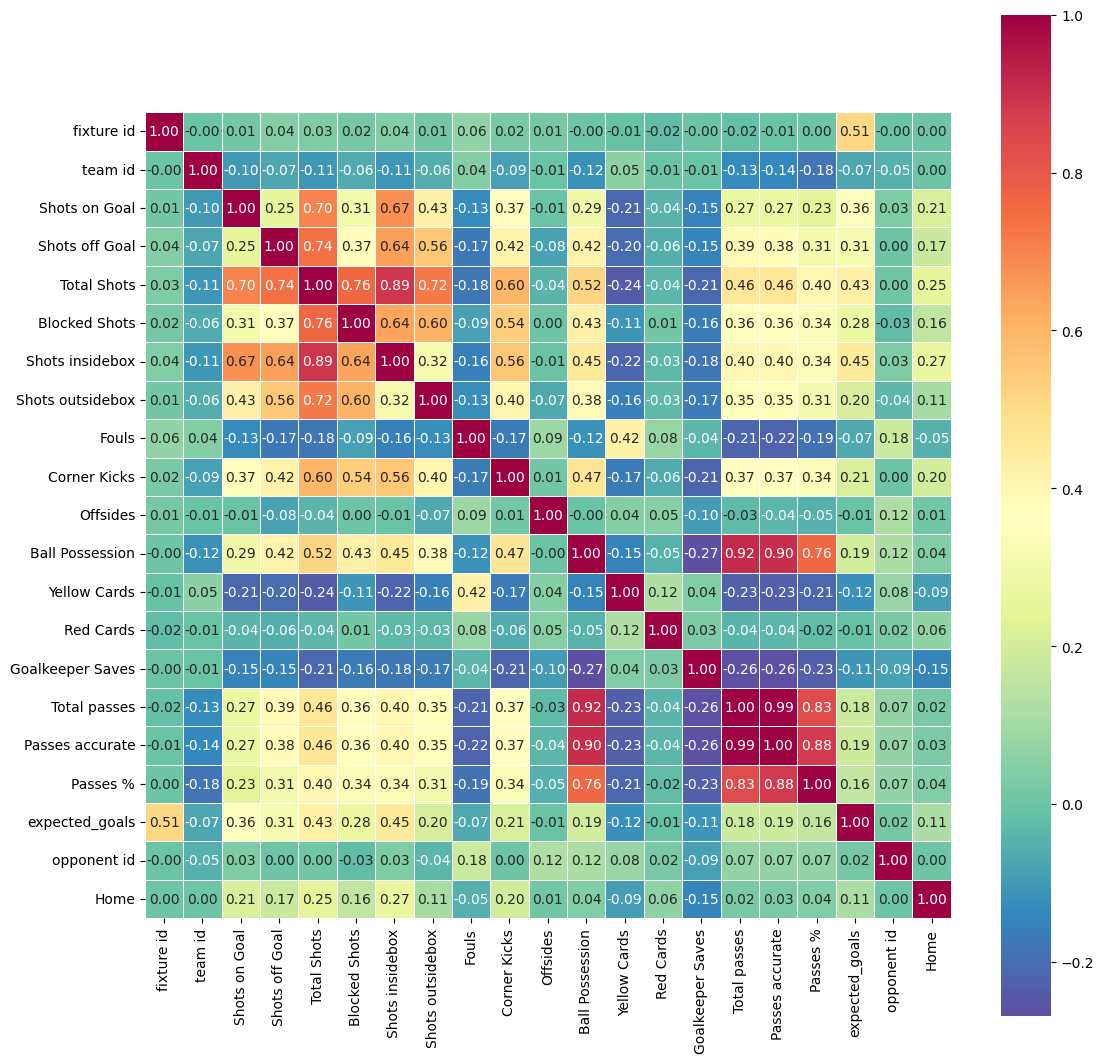

In [162]:
#plot correlation as heatmap
import matplotlib.pyplot as plt
#plt.figure (figsize = (13 , 13) )
#sns.heatmap(match_stats_df.corr(), annot=True, cmap='RdYlGn', center=0, square=True)

corrmat = df.corr()
plt.figure(figsize=(13,13))

hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=df.columns, 
                 xticklabels=df.columns, 
                 cmap="Spectral_r",
                linewidths=.5)
plt.show()

Considering the Red card has no effect on the final result, we would drop it

In [163]:
match_stats_df = match_stats_df.drop(columns=['Red Cards'])

Creating an Initial predictions.
import model from scikit learn use Random forest classifier to detect non-linearity in our data.

In [164]:
from sklearn.ensemble import RandomForestClassifier



In [165]:
match_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   fixture id        760 non-null    int64         
 1   team id           760 non-null    int32         
 2   team name         760 non-null    object        
 3   Shots on Goal     760 non-null    int32         
 4   Shots off Goal    760 non-null    int32         
 5   Total Shots       760 non-null    int64         
 6   Blocked Shots     760 non-null    int32         
 7   Shots insidebox   760 non-null    int32         
 8   Shots outsidebox  760 non-null    int32         
 9   Fouls             760 non-null    int64         
 10  Corner Kicks      760 non-null    int32         
 11  Offsides          760 non-null    int32         
 12  Ball Possession   760 non-null    int32         
 13  Yellow Cards      760 non-null    int32         
 14  Goalkeeper Saves  760 non-

In [166]:
match_stats_df['date']

0     2022-08-05
1     2022-08-05
2     2022-08-06
3     2022-08-06
4     2022-08-06
         ...    
755   2023-05-28
756   2023-05-28
757   2023-05-28
758   2023-05-28
759   2023-05-28
Name: date, Length: 760, dtype: datetime64[ns]

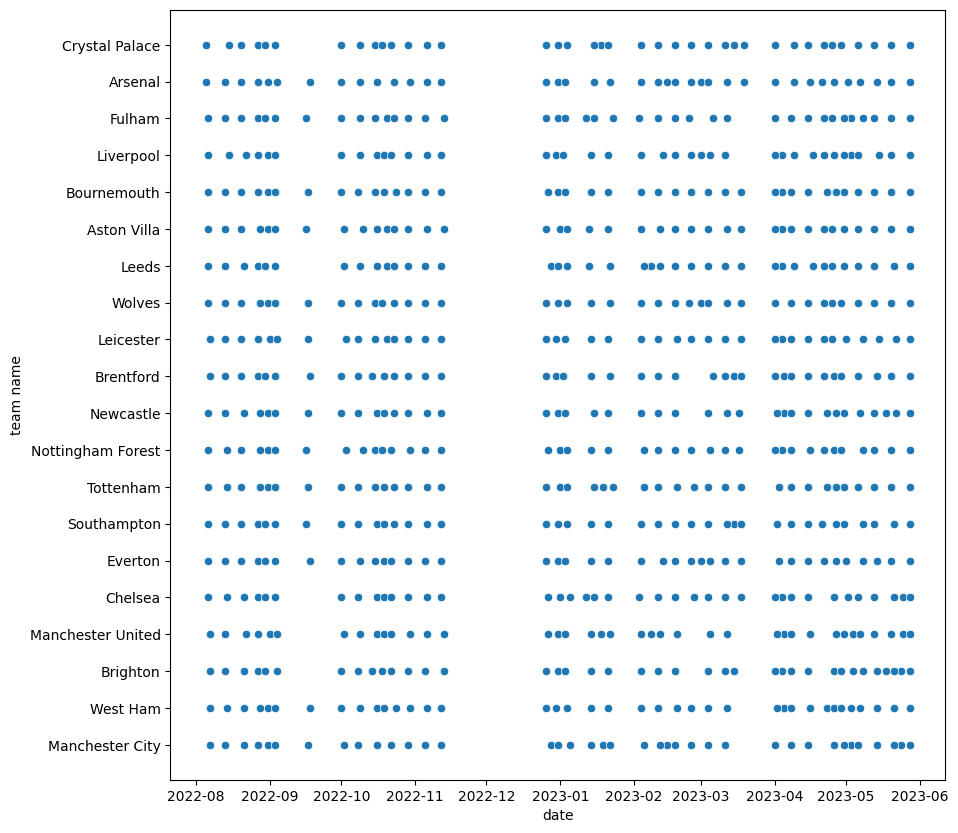

In [167]:
sns.scatterplot(data=match_stats_df, x=match_stats_df['date'], y=match_stats_df['team name'])
mpl.rcParams['figure.figsize'] = [10,10]

Since we dropped Red card, it is still included in our correlation feature, we need to engineer a new correlation feature

In [168]:
corr_features = ['fixture id', 'team id', 'Shots on Goal', 'Shots off Goal',
       'Total Shots', 'Blocked Shots', 'Shots insidebox', 'Shots outsidebox',
       'Fouls', 'Corner Kicks', 'Offsides', 'Ball Possession', 'Yellow Cards', 
       'Goalkeeper Saves', 'Total passes', 'Passes accurate',
       'Passes %', 'expected_goals', 'opponent id', 'Home'
       ]

Building an Initial model, validating accuracy using Accuracy score (bacause we are predicting multiple values) and Confusion matrix

In [169]:
from sklearn.multiclass import OneVsOneClassifier 
from sklearn.metrics import accuracy_score #calculate accuracy score
from sklearn.inspection import permutation_importance

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#define a function that builds a confusion matrix for the test set

def plot_confusion_matrix(y_test, pred, labels):
    cm = confusion_matrix(y_test, pred, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=labels)
    disp.plot()
    plt.show()

 #accuracy pipeline function splits the data into test and training data based on the date,     

def accuracy_pipeline(features_df, features):
    df = features_df[features].copy()

    df[['team id','opponent id','Home']] = features_df[['team id','opponent id','Home']]
    df['result'] = features_df['result']
    df['date'] = features_df['date']

    train = df[df['date']<'2023-03-03']

    X_train = train.drop(columns=['date','result'])
    y_train = train['result']

    test = df[df['date']>'2023-03-03']

    X_test = test.drop(columns=['date','result'])
    y_test = test['result']
#Trains our Random Forest Classifier using our training data
# n_estimator -number of individual decision trees we want to train, 50 because the higher the number the more accurate the prediction will be.
#min_sample - number of samples we want to have in a leaf of the decision tree - the higher the number the less likely we are to overfit data to model but the lower the accuracy on the training data
#random state - with recurring runs - results doesnt change.
    
    rf = RandomForestClassifier(max_depth=10, max_features=10, min_samples_split=15,
                       n_estimators=25, random_state=0)
    #using One-vs-One classifier because we are dealing with multi-class classification (our results are 1, 0 -1)
    ovo =rf
    ovo.fit(X_train, y_train)

    train_pred = ovo.predict(X_train)#train prediction data from the one-vs-one classifier prediction of our X-train data
    train_acc= accuracy_score(y_train, train_pred)

    test_pred = ovo.predict(X_test)#test prediction data from the one-vs-one classifier prediction of our X-testing data
    test_acc= accuracy_score(y_test, test_pred)#calculate accuracy score from y test data and test prediction data

    plot_confusion_matrix(y_test, test_pred, ovo.classes_)
    
    print(f'training accuracy score: {train_acc}, test accuracy score: {test_acc}')
    
    results = permutation_importance(ovo, X_train, y_train, scoring='accuracy')
    important_features = results.importances_mean
    important_features_df = pd.DataFrame({'Features':X_train.columns, 'Importance': important_features})

    return {'feature importance': corr_features}

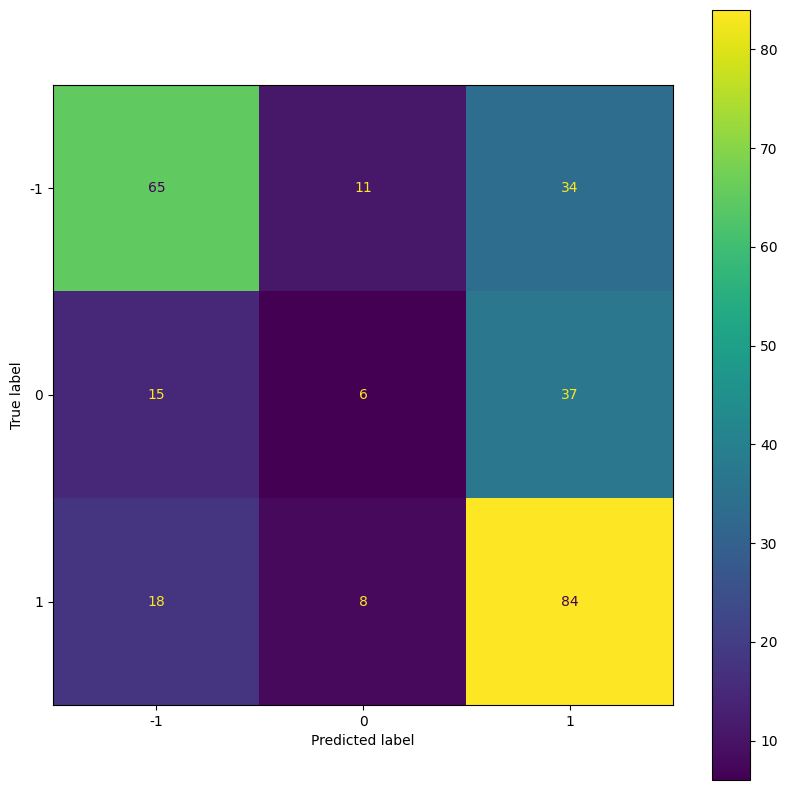

training accuracy score: 0.8713692946058091, test accuracy score: 0.5575539568345323


In [170]:
ans=accuracy_pipeline(match_stats_df, corr_features)

# Improving Model Accuracy with Rolling Average
In order to improve model accuracy, we have to carry out self joining to the data where we will condsider opponents team features, subract Data from team and 


In [171]:
match_stats_df.columns

Index(['fixture id', 'team id', 'team name', 'Shots on Goal', 'Shots off Goal',
       'Total Shots', 'Blocked Shots', 'Shots insidebox', 'Shots outsidebox',
       'Fouls', 'Corner Kicks', 'Offsides', 'Ball Possession', 'Yellow Cards',
       'Goalkeeper Saves', 'Total passes', 'Passes accurate', 'Passes %',
       'expected_goals', 'opponent id', 'opponent name', 'Home', 'full_time',
       'date', 'result'],
      dtype='object')

In [172]:
match_stats_df['% Shots insidebox'] = (match_stats_df['Shots insidebox'])/match_stats_df['Total Shots']
match_stats_df['% Shot accuracy'] = (match_stats_df['Shots on Goal'] + match_stats_df['Blocked Shots'])/match_stats_df['Total Shots']

In [173]:
match_stats_df.columns

Index(['fixture id', 'team id', 'team name', 'Shots on Goal', 'Shots off Goal',
       'Total Shots', 'Blocked Shots', 'Shots insidebox', 'Shots outsidebox',
       'Fouls', 'Corner Kicks', 'Offsides', 'Ball Possession', 'Yellow Cards',
       'Goalkeeper Saves', 'Total passes', 'Passes accurate', 'Passes %',
       'expected_goals', 'opponent id', 'opponent name', 'Home', 'full_time',
       'date', 'result', '% Shots insidebox', '% Shot accuracy'],
      dtype='object')

In [174]:
full_match_stats_df = pd.merge(match_stats_df,match_stats_df , 
                               left_on=['fixture id', 'opponent name'],
                               right_on=['fixture id', 'team name'], suffixes=("", "_away")
                               )

In [175]:
important_features = [ 'Shots on Goal', 'Shots off Goal',
       'Total Shots', 'Blocked Shots', 'Shots insidebox', 'Shots outsidebox',
        'Corner Kicks', 'Ball Possession', 'Goalkeeper Saves', 'Total passes', 'Passes accurate',
       'Passes %', 'expected_goals']
#selecting important features based off of domain knowledge

In [176]:
#considering the opponents team features
opponent_improved_features = []
for i in important_features:
    opponent_improved_features.append(i+'_away')


In [177]:
len(corr_features + opponent_improved_features)

33

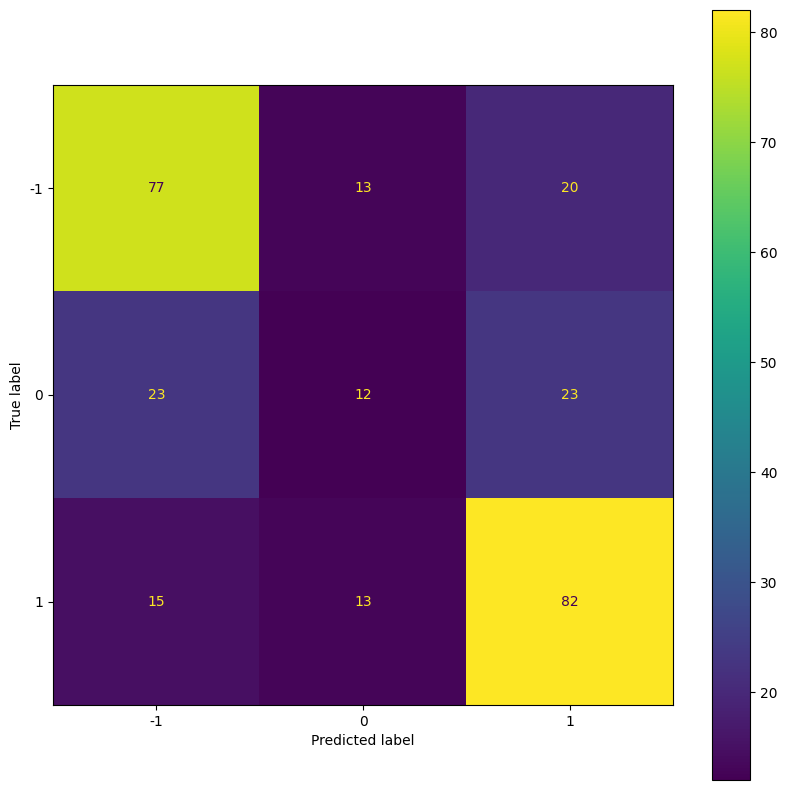

training accuracy score: 0.9253112033195021, test accuracy score: 0.6151079136690647


{'feature importance': ['fixture id',
  'team id',
  'Shots on Goal',
  'Shots off Goal',
  'Total Shots',
  'Blocked Shots',
  'Shots insidebox',
  'Shots outsidebox',
  'Fouls',
  'Corner Kicks',
  'Offsides',
  'Ball Possession',
  'Yellow Cards',
  'Goalkeeper Saves',
  'Total passes',
  'Passes accurate',
  'Passes %',
  'expected_goals',
  'opponent id',
  'Home']}

In [178]:
#test accuracy again
accuracy_pipeline(full_match_stats_df, important_features+opponent_improved_features)

In [179]:
#subtract both team data
df = pd.DataFrame()
for col1, col2 in zip(important_features, opponent_improved_features):
    df[col1] = full_match_stats_df[col1] - full_match_stats_df[col2]

    df[['team id', 'opponent id', 'Home']] = full_match_stats_df[['team id', 'opponent id', 'Home']]
    df['result'] = full_match_stats_df['result']
    df['date'] = full_match_stats_df['date']

## Visualise our new dataframe's Key feature columns to detect correlation


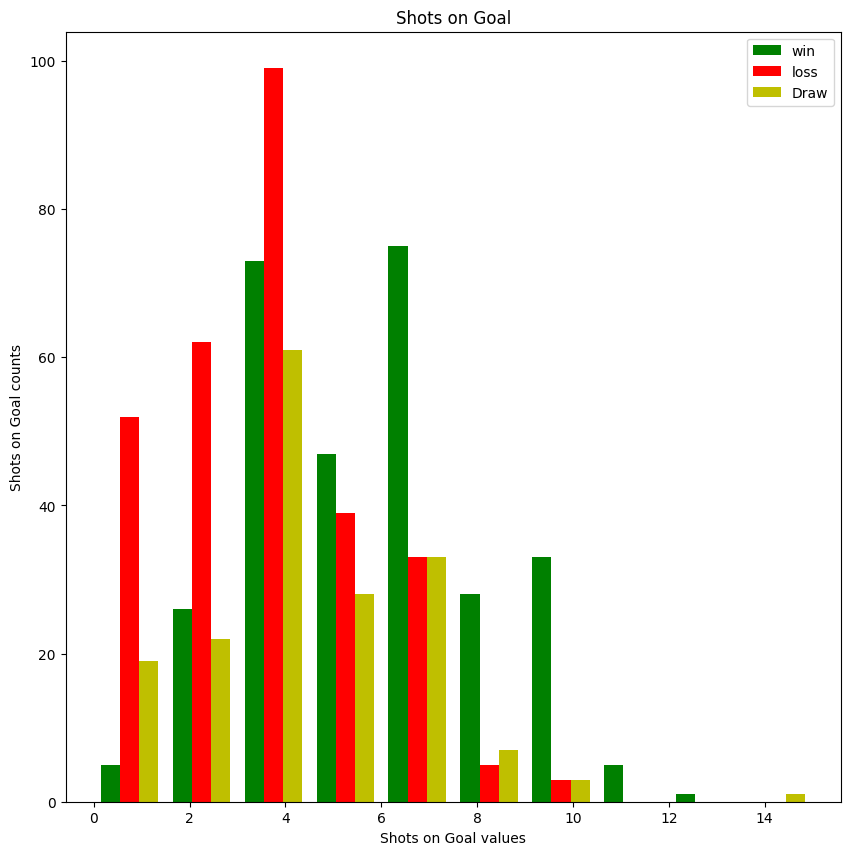

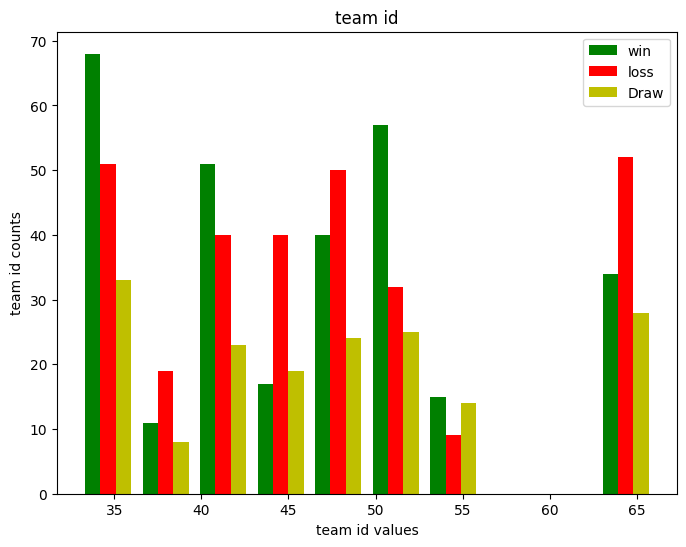

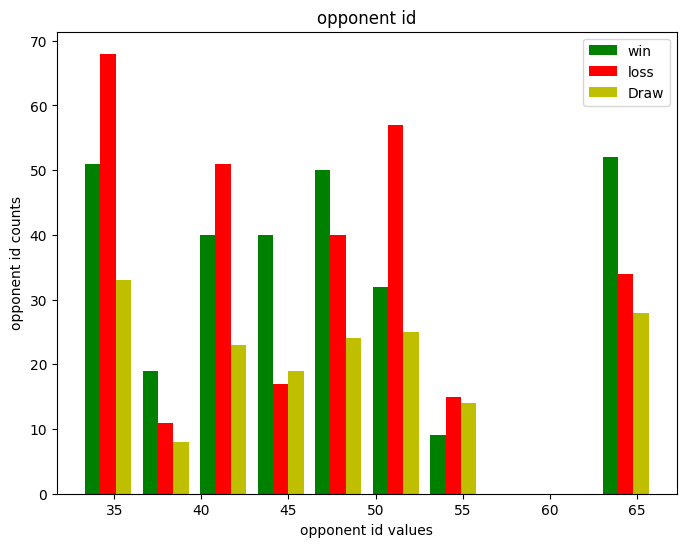

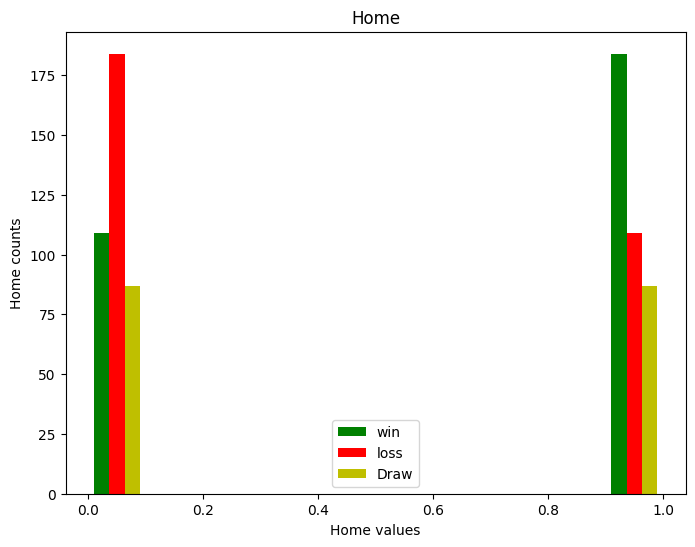

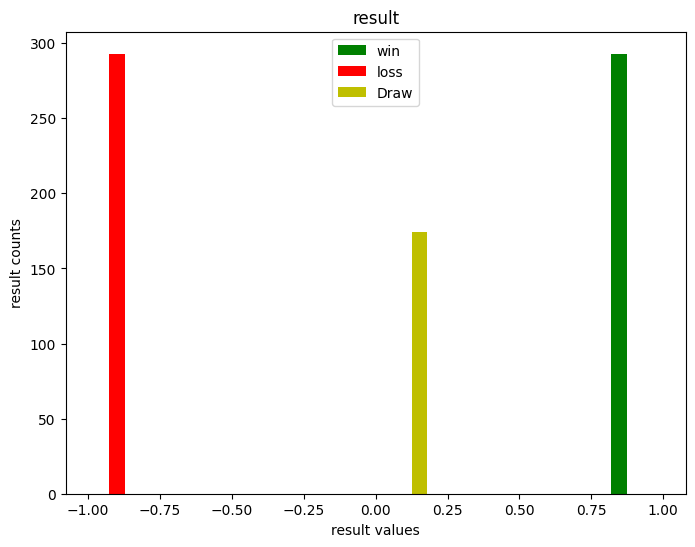

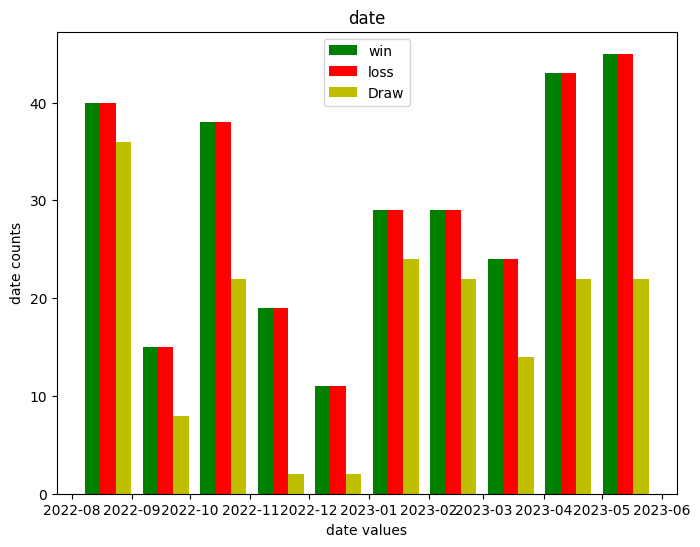

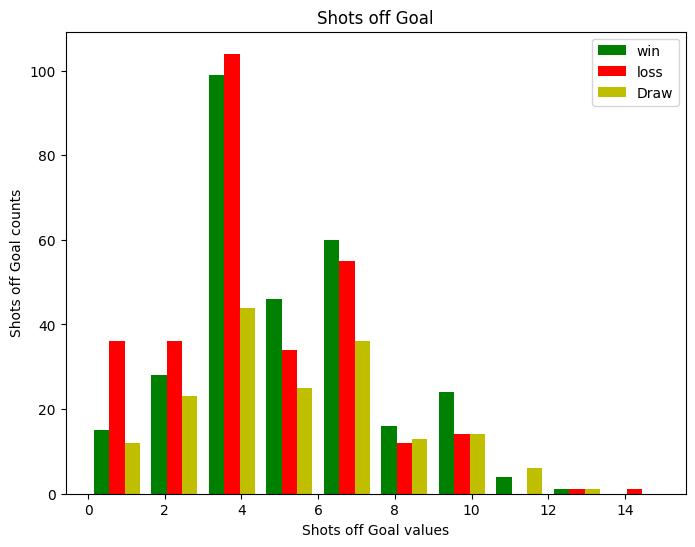

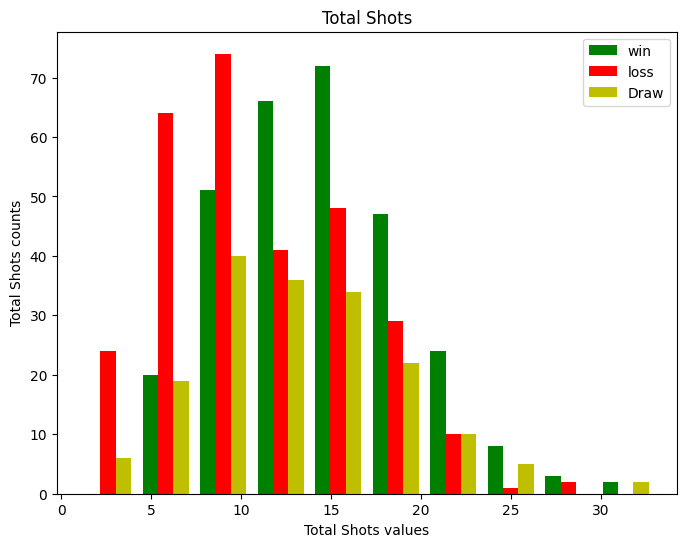

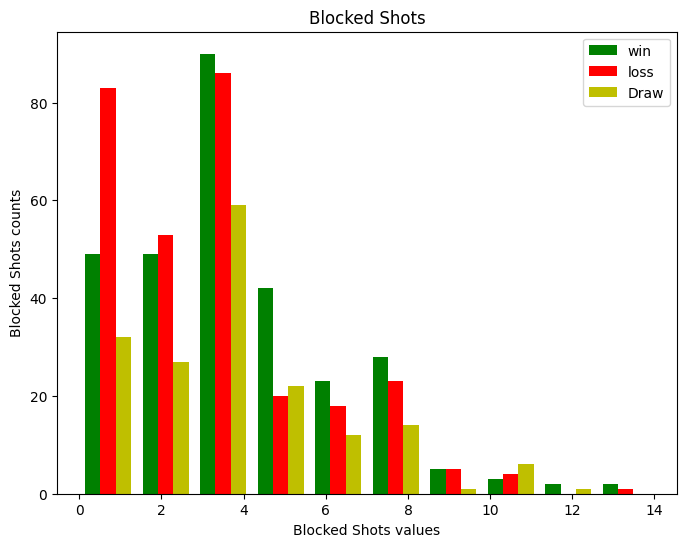

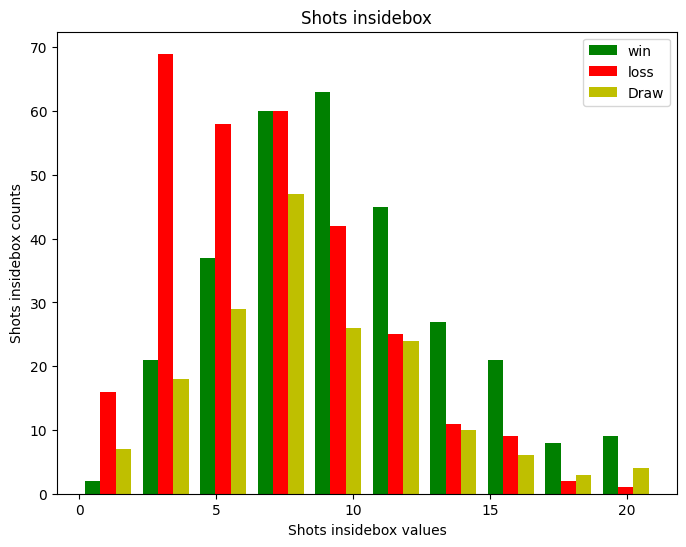

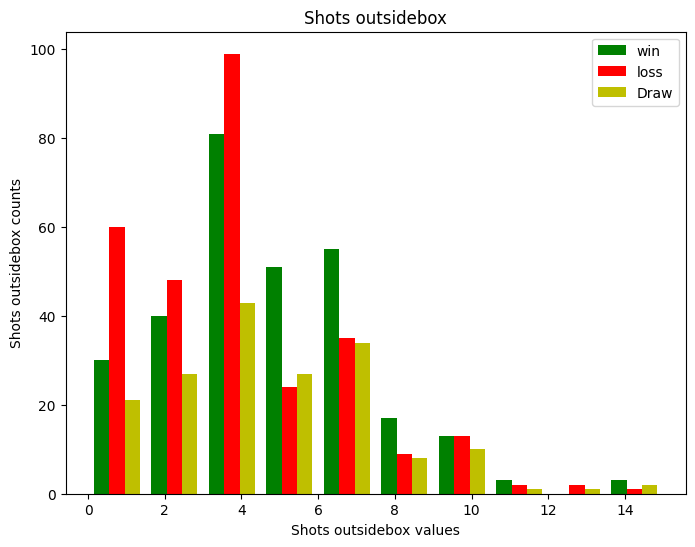

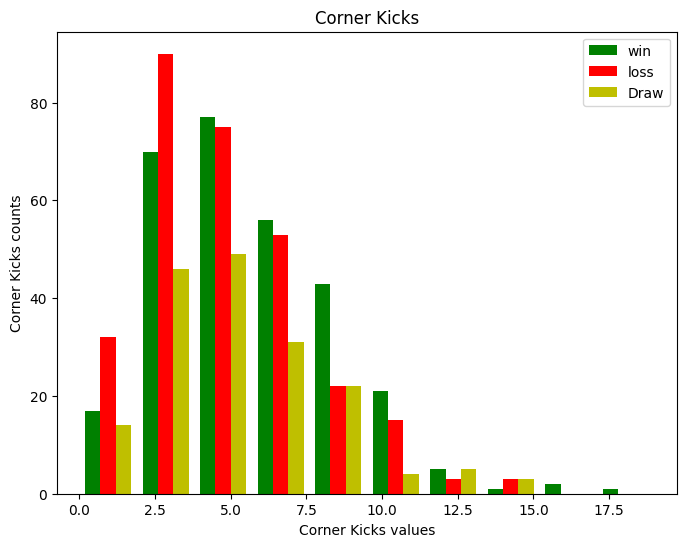

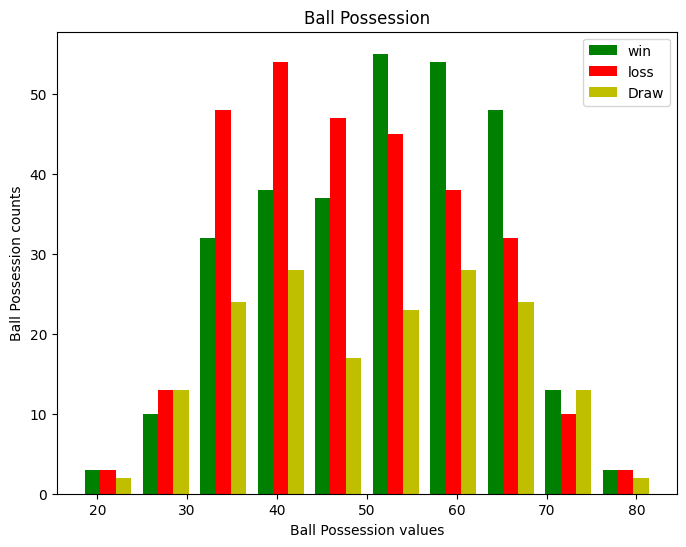

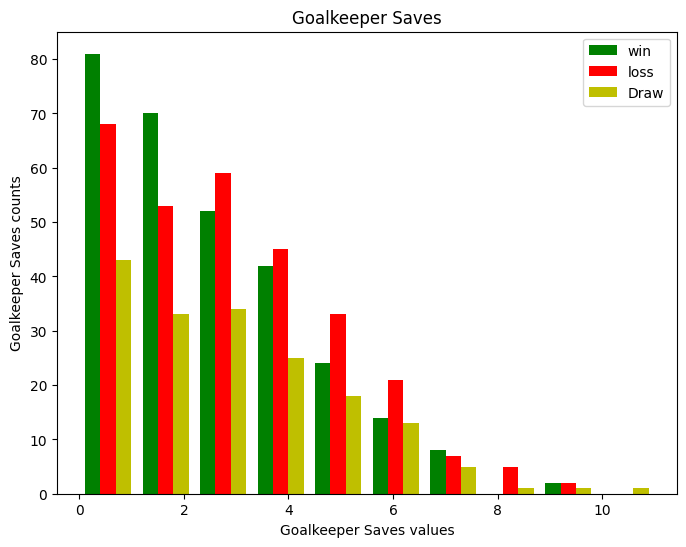

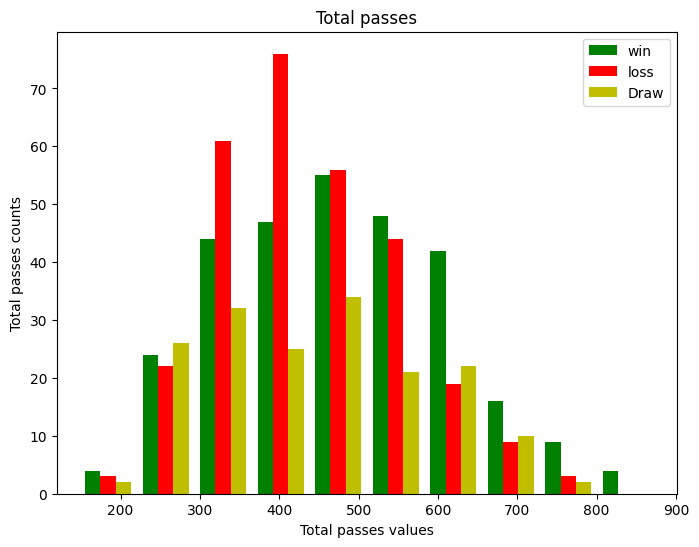

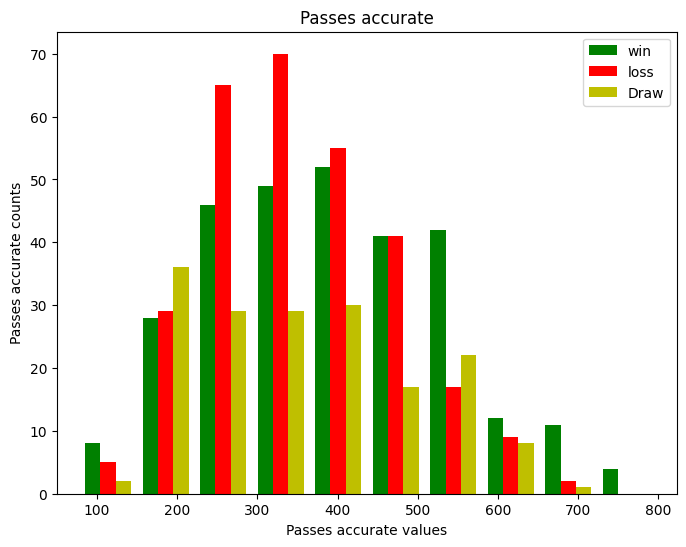

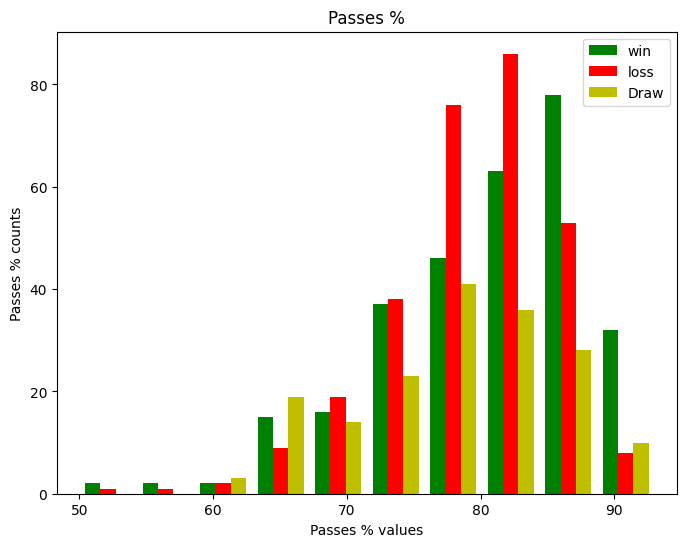

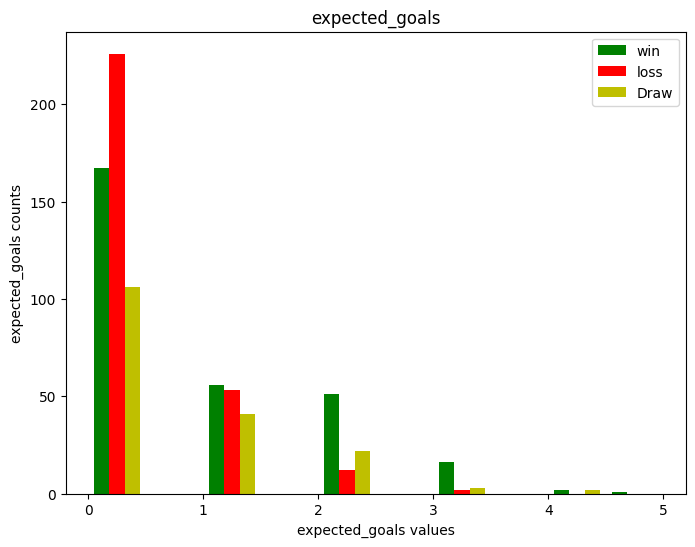

<Figure size 800x600 with 0 Axes>

In [180]:
win_df = full_match_stats_df[full_match_stats_df['result']== 1]
loss_df = full_match_stats_df[full_match_stats_df['result'] == -1]
draw_df = full_match_stats_df [full_match_stats_df['result'] == 0]

for col in df.columns:
    plt.hist([win_df[col], loss_df[col], draw_df[col]], color=['g', 'r', 'y'])
    plt.title(col)
    plt.legend(['win', 'loss', 'Draw'])
    plt.xlabel(f'{col} values')
    plt.ylabel(f'{col} counts')
    plt.show()
    plt.figure(figsize=(8, 6))
  


In [181]:
#based off of the visualization, we will be deriving new improved features to further improve our chances of accuracy
new_improved_features = ['Shots on Goal','Total Shots', 'Shots insidebox', 'Ball Possession', 'Goalkeeper Saves', 'Passes %', 'expected_goals', '% Shot accuracy']

In [182]:
opponent_improved_features

['Shots on Goal_away',
 'Shots off Goal_away',
 'Total Shots_away',
 'Blocked Shots_away',
 'Shots insidebox_away',
 'Shots outsidebox_away',
 'Corner Kicks_away',
 'Ball Possession_away',
 'Goalkeeper Saves_away',
 'Total passes_away',
 'Passes accurate_away',
 'Passes %_away',
 'expected_goals_away']

In [183]:
def rolling_features(cols, new_cols, df):
    df = df.sort_values('date')
    rolling_vals = df[cols].rolling(3, closed='left').mean()
    df[new_cols]=rolling_vals
    return df.dropna()



In [184]:
rolling_cols = [f'{col}_rolling' for col in new_improved_features]


In [185]:
rolling_home_df = full_match_stats_df.groupby('team name').apply(lambda x: rolling_features(new_improved_features, rolling_cols, x))
rolling_home_df

fixture id  team id team name  Shots on Goal  Shots off Goal  \
team name                                                                     
Arsenal   60       867976       42   Arsenal              8               4   
          82       867987       42   Arsenal              9               6   
          111      868001       42   Arsenal              3               8   
          143      868017       42   Arsenal              7               4   
          162      868027       42   Arsenal              9               9   
...                   ...      ...       ...            ...             ...   
Wolves    667      868279       39    Wolves              2               5   
          698      868295       39    Wolves              2               2   
          717      868304       39    Wolves              0               5   
          738      868315       39    Wolves              5               6   
          741      868316       39    Wolves              0               4   

               Total Shots  Blocked Shots  Shots insidebox  Shots outsidebox  \
team name                                                                      
Arsenal   60            22             10               16                 6   
          82            22              7               14                 8   
          111           16              5                9                 7   
          143           13              2                8                 5   
          162           22              4               11                11   
...                    ...            ...              ...               ...   
Wolves    667           10              3                6                 4   
          698            6              2                4                 2   
          717            5              0                5                 0   
          738           13              2               10                 3   
          741            6              2                4                 2   

               Fouls  ...  % Shots insidebox_away  % Shot accuracy_away  \
team name             ...                                                 
Arsenal   60       6  ...                0.818182              0.454545   
          82      10  ...                0.750000              0.750000   
          111      9  ...                0.700000              0.700000   
          143     10  ...                0.800000              0.400000   
          162     10  ...                0.571429              0.714286   
...              ...  ...                     ...                   ...   
Wolves    667     11  ...                0.681818              0.681818   
          698     20  ...                0.750000              0.625000   
          717      9  ...                0.481481              0.592593   
          738     18  ...                0.526316              0.526316   
          741     11  ...                0.785714              0.714286   

               Shots on Goal_rolling  Total Shots_rolling  \
team name                                                   
Arsenal   60                5.000000            14.333333   
          82                7.000000            18.333333   
          111               7.666667            19.333333   
          143               6.666667            20.000000   
          162               6.333333            17.000000   
...                              ...                  ...   
Wolves    667               5.000000            12.000000   
          698               2.666667            11.666667   
          717               2.333333             8.333333   
          738               1.333333             7.000000   
          741               2.333333             8.000000   

               Shots insidebox_rolling  Ball Possession_rolling  \
team name                                                         
Arsenal   60                 11.333333    

In [186]:
rolling_home_df.columns

Index(['fixture id', 'team id', 'team name', 'Shots on Goal', 'Shots off Goal',
       'Total Shots', 'Blocked Shots', 'Shots insidebox', 'Shots outsidebox',
       'Fouls', 'Corner Kicks', 'Offsides', 'Ball Possession', 'Yellow Cards',
       'Goalkeeper Saves', 'Total passes', 'Passes accurate', 'Passes %',
       'expected_goals', 'opponent id', 'opponent name', 'Home', 'full_time',
       'date', 'result', '% Shots insidebox', '% Shot accuracy',
       'team id_away', 'team name_away', 'Shots on Goal_away',
       'Shots off Goal_away', 'Total Shots_away', 'Blocked Shots_away',
       'Shots insidebox_away', 'Shots outsidebox_away', 'Fouls_away',
       'Corner Kicks_away', 'Offsides_away', 'Ball Possession_away',
       'Yellow Cards_away', 'Goalkeeper Saves_away', 'Total passes_away',
       'Passes accurate_away', 'Passes %_away', 'expected_goals_away',
       'opponent id_away', 'opponent name_away', 'Home_away', 'full_time_away',
       'date_away', 'result_away', '% Shots ins

In [187]:
rolling_home_df = rolling_home_df.droplevel('team name')

In [188]:
rolling_home_df = rolling_home_df[['fixture id', 'team id']+ new_improved_features+rolling_cols]

In [189]:
rolling_opponent_cols = [f'{col}_rolling' for col in opponent_improved_features]

In [190]:
opponent_rolling_df = full_match_stats_df.groupby('opponent name').apply(lambda x: rolling_features(opponent_improved_features, rolling_opponent_cols, x))

In [191]:
opponent_rolling_df = opponent_rolling_df.droplevel('opponent name')

In [192]:
opponent_rolling_df = opponent_rolling_df[['fixture id', 'team id']+opponent_improved_features+rolling_opponent_cols]

In [193]:
rolling_df = pd.merge(rolling_home_df, opponent_rolling_df, on=['fixture id', 'team id'])

In [194]:
rolling_df = pd.merge(rolling_df, full_match_stats_df[['fixture id', 'team id', 'result', 'opponent id', 'Home', 'date']], on=['fixture id', 'team id'])

In [195]:
rolling_df.columns

Index(['fixture id', 'team id', 'Shots on Goal', 'Total Shots',
       'Shots insidebox', 'Ball Possession', 'Goalkeeper Saves', 'Passes %',
       'expected_goals', '% Shot accuracy', 'Shots on Goal_rolling',
       'Total Shots_rolling', 'Shots insidebox_rolling',
       'Ball Possession_rolling', 'Goalkeeper Saves_rolling',
       'Passes %_rolling', 'expected_goals_rolling', '% Shot accuracy_rolling',
       'Shots on Goal_away', 'Shots off Goal_away', 'Total Shots_away',
       'Blocked Shots_away', 'Shots insidebox_away', 'Shots outsidebox_away',
       'Corner Kicks_away', 'Ball Possession_away', 'Goalkeeper Saves_away',
       'Total passes_away', 'Passes accurate_away', 'Passes %_away',
       'expected_goals_away', 'Shots on Goal_away_rolling',
       'Shots off Goal_away_rolling', 'Total Shots_away_rolling',
       'Blocked Shots_away_rolling', 'Shots insidebox_away_rolling',
       'Shots outsidebox_away_rolling', 'Corner Kicks_away_rolling',
       'Ball Possession_away_ro

In [196]:
#based off of the visualization, we will be selecting the most impactful features and creating new feature lists
#merge rolling average of opponent team
improved_rolling_features = ['Passes %_rolling', 'Ball Possession_rolling', 'Shots on Goal_rolling', 'Total Shots_rolling']
opponent_improved_rolling_features = ['Shots on Goal_away_rolling','Total Shots_away_rolling','Ball Possession_away_rolling','Passes %_away_rolling']

In [197]:
new_improved_features

['Shots on Goal',
 'Total Shots',
 'Shots insidebox',
 'Ball Possession',
 'Goalkeeper Saves',
 'Passes %',
 'expected_goals',
 '% Shot accuracy']

In [198]:
opponent_improved_features

['Shots on Goal_away',
 'Shots off Goal_away',
 'Total Shots_away',
 'Blocked Shots_away',
 'Shots insidebox_away',
 'Shots outsidebox_away',
 'Corner Kicks_away',
 'Ball Possession_away',
 'Goalkeeper Saves_away',
 'Total passes_away',
 'Passes accurate_away',
 'Passes %_away',
 'expected_goals_away']

In [199]:
df = pd.DataFrame()
for col1, col2 in zip(new_improved_features, opponent_improved_features):
    df[col1] = rolling_df[col1]-rolling_df[col2]

df[['team id','opponent id','Home']] = rolling_df[['team id','opponent id','Home']]
df['result'] = rolling_df['result']
df['date'] = rolling_df['date']


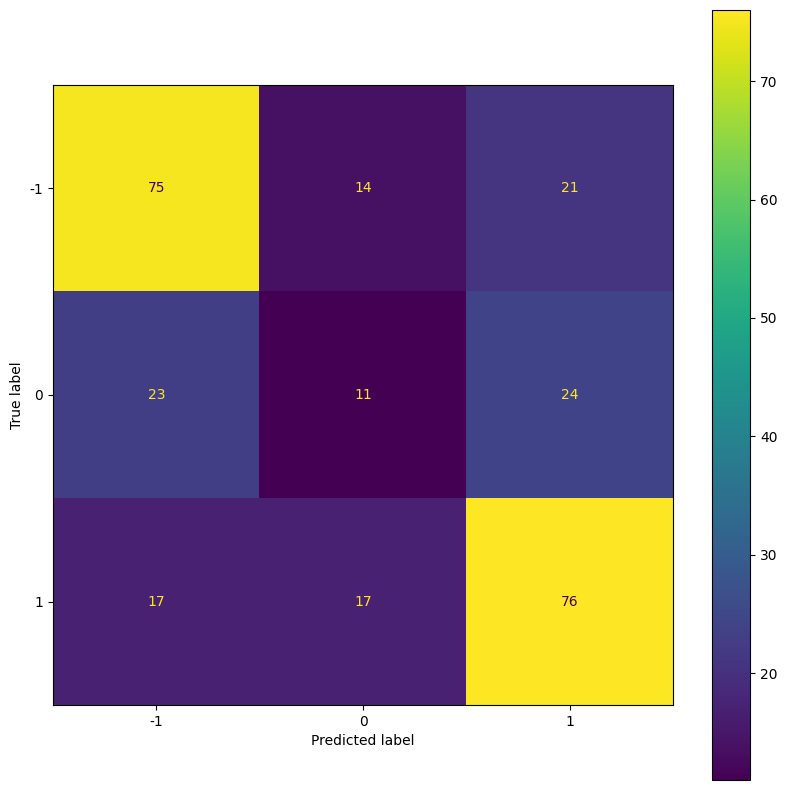

training accuracy score: 0.8222748815165877, test accuracy score: 0.5827338129496403


{'feature importance': ['fixture id',
  'team id',
  'Shots on Goal',
  'Shots off Goal',
  'Total Shots',
  'Blocked Shots',
  'Shots insidebox',
  'Shots outsidebox',
  'Fouls',
  'Corner Kicks',
  'Offsides',
  'Ball Possession',
  'Yellow Cards',
  'Goalkeeper Saves',
  'Total passes',
  'Passes accurate',
  'Passes %',
  'expected_goals',
  'opponent id',
  'Home']}

In [200]:
accuracy_pipeline(df, df.columns)

In [201]:
#Split data into test and train data with 84% to train and 16% to test
train = df[df['date']<'2023-04-28']

X_train = train.drop(columns=['date','result'])
y_train = train['result']

test = df[df['date']>'2023-04-28']

X_test = test.drop(columns=['date','result'])
y_test = test['result']

In [202]:
#Initialize Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=60, min_samples_split=15,random_state=10, max_depth=15)

In [203]:
#Training our model with our X_train variables and target variable y_train
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_split=15, n_estimators=60,
                       random_state=10)

Hyperparameter Tuning:Finding the optimal set of hyperparameters for our model

In [204]:
#Grid search initialization
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [10, 25], 'max_features': [5, 10], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False], 'random_state': [0, 50]}
]
#Using mean squared error as the scoring metric because our y_train data is numerical
grid_search_forest = GridSearchCV(rf, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=15,
                                              min_samples_split=15,
                                              n_estimators=60,
                                              random_state=10),
             param_grid=[{'bootstrap': [True, False],
                          'max_depth': [10, 50, None], 'max_features': [5, 10],
                          'n_estimators': [10, 25], 'random_state': [0, 50]}],
             scoring='neg_mean_squared_error')

In [229]:
#Using the best estimator from the grid search to make predictions on our test data (X_test)
grid_pred = grid_search_forest.best_estimator_.predict(X_test)

In [230]:
#Gives us the best-fitted model from the grid search
grid_search_forest.best_estimator_

RandomForestClassifier(max_depth=10, max_features=5, min_samples_split=15,
                       n_estimators=25, random_state=0)

In [231]:
#Import accuracy score function to compare the predicted labels (grid_pred) with the true labels (y_test) and calculates the accuracy.
from sklearn.metrics import accuracy_score
accuracy_score(y_test, grid_pred)

0.5625

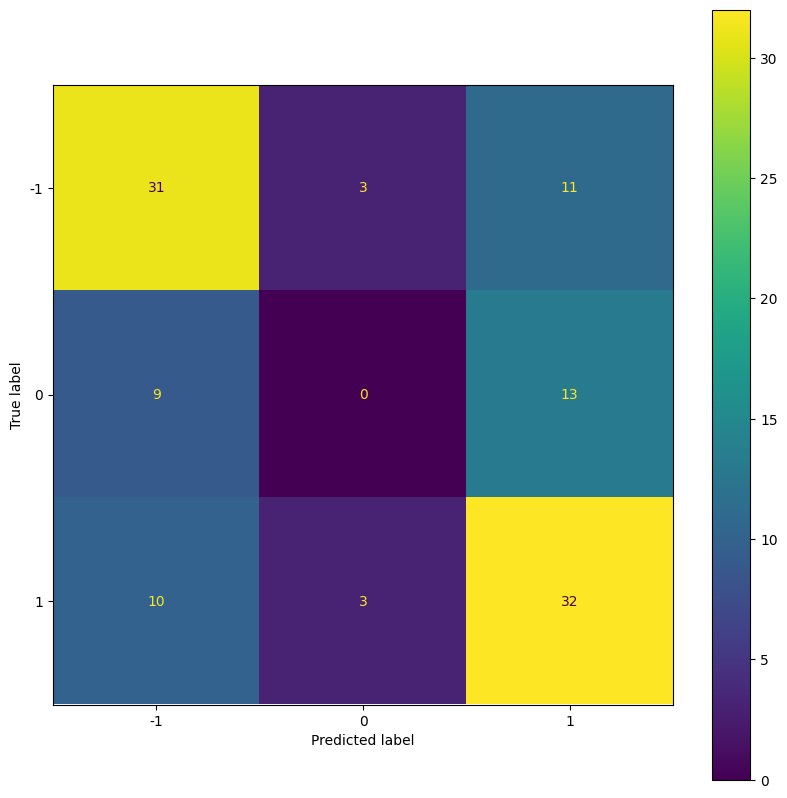

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [232]:
#Once again, visualize the confusion matrix for our model's predictions on the grid prediction using the test data

cm = confusion_matrix(y_test, grid_pred, labels=grid_search_forest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=grid_search_forest.classes_)
disp.plot()
plt.show()
plt.figure(figsize=(10, 8))

In [233]:
#Randomized Search(hyperparameter values are randomly sampled)
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, n_iter = 30, cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(max_depth=15,
                                                    min_samples_split=15,
                                                    n_estimators=60,
                                                    random_state=10),
                   n_iter=30, n_jobs=-1,
                   param_distributions=[{'bootstrap': [True, False],
                                         'max_depth': [10, 50, None],
                                         'max_features': [5, 10],
                                         'n_estimators': [10, 25],
                                         'random_state': [0, 50]}],
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [234]:
#Using the best estimator obtained from the randomized search to make predictions on the test set
random_pred = rf_random.predict(X_test)

In [235]:
#Performing an accuracy score on our random search
accuracy_score(y_test, random_pred)

0.5714285714285714

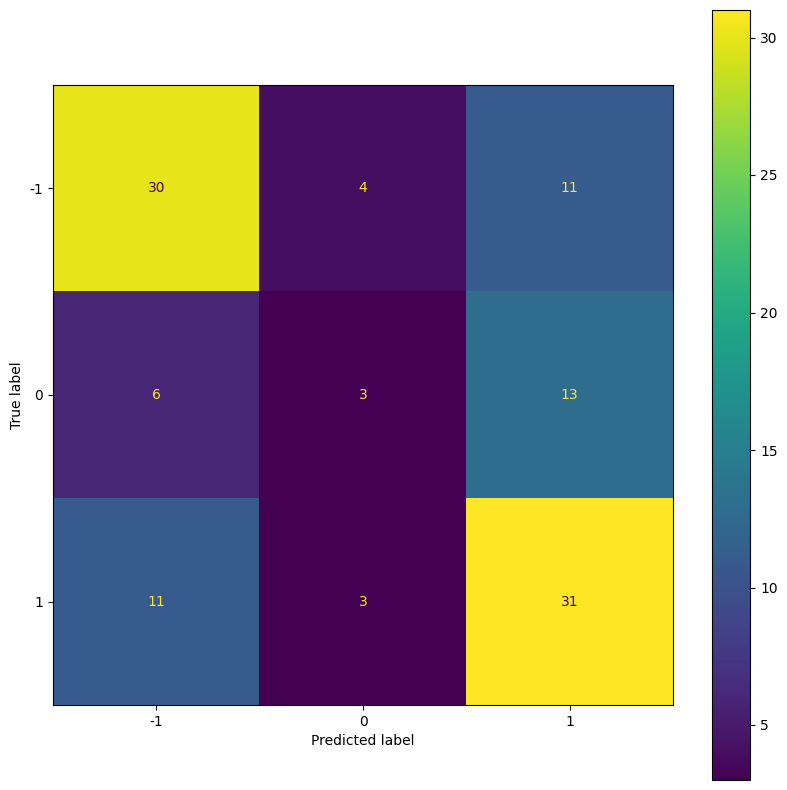

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [236]:
#Once again, visualize the confusion matrix for our model's predictions on the random search prediction using the test data

cm = confusion_matrix(y_test, random_pred, labels=rf_random.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=rf_random.classes_)
disp.plot()
plt.show()
plt.figure(figsize=(10, 8))

### Both Grid and Randomized search are giving a similar answer therefore the final accuracy of our model is 0.57

In [237]:
df.head(5)

,Shots on Goal,Total Shots,Shots insidebox,Ball Possession,Goalkeeper Saves,Passes %,expected_goals,% Shot accuracy,team id_x,opponent id_x,...,result_x,date_x,date_y,team id_y,opponent id_y,result_y,date,team id,opponent id,result
0,5,16,5,70,-7,84,-2,-27.181818,42,36,...,1,2022-08-27,2022-08-27,42,36,1,2022-08-27,42,36,1
1,6,21,10,59,-1,84,-3,-40.272727,42,66,...,1,2022-08-31,2022-08-31,42,66,1,2022-08-31,42,66,1
2,-3,13,-1,59,-4,80,-2,-39.500000,42,33,...,-1,2022-09-04,2022-09-04,42,33,-1,2022-09-04,42,33,-1
3,5,10,3,64,-2,85,-3,-35.307692,42,55,...,1,2022-09-18,2022-09-18,42,55,1,2022-09-18,42,55,1
4,6,20,4,63,-2,87,-2,-34.409091,42,47,...,1,2022-10-01,2022-10-01,42,47,1,2022-10-01,42,47,1


In [238]:
df.columns

Index(['Shots on Goal', 'Total Shots', 'Shots insidebox', 'Ball Possession',
       'Goalkeeper Saves', 'Passes %', 'expected_goals', '% Shot accuracy',
       'team id_x', 'opponent id_x', 'Home', 'result_x', 'date_x', 'date_y',
       'team id_y', 'opponent id_y', 'result_y', 'date', 'team id',
       'opponent id', 'result'],
      dtype='object')

In [239]:
rolling_df.columns

Index(['fixture id', 'team id', 'Shots on Goal', 'Total Shots',
       'Shots insidebox', 'Ball Possession', 'Goalkeeper Saves', 'Passes %',
       'expected_goals', '% Shot accuracy', 'Shots on Goal_rolling',
       'Total Shots_rolling', 'Shots insidebox_rolling',
       'Ball Possession_rolling', 'Goalkeeper Saves_rolling',
       'Passes %_rolling', 'expected_goals_rolling', '% Shot accuracy_rolling',
       'Shots on Goal_away', 'Shots off Goal_away', 'Total Shots_away',
       'Blocked Shots_away', 'Shots insidebox_away', 'Shots outsidebox_away',
       'Corner Kicks_away', 'Ball Possession_away', 'Goalkeeper Saves_away',
       'Total passes_away', 'Passes accurate_away', 'Passes %_away',
       'expected_goals_away', 'Shots on Goal_away_rolling',
       'Shots off Goal_away_rolling', 'Total Shots_away_rolling',
       'Blocked Shots_away_rolling', 'Shots insidebox_away_rolling',
       'Shots outsidebox_away_rolling', 'Corner Kicks_away_rolling',
       'Ball Possession_away_ro

In [242]:
df = df.merge(rolling_df[["date", "team id", "opponent id", "result"]], left_index=True, right_index=True)

#result x = actual result, result y - predicted result

MergeError: Passing 'suffixes' which cause duplicate columns {'date_x', 'team id_x', 'result_x', 'opponent id_x'} is not allowed.

In [222]:
new_df = df[["date", "result_x", "result_y", "team id", "opponent id", "result"]]


In [241]:
new_df.tail(5)

,date,result_x,result_y,team id,opponent id,result
695,2023-04-29,-1,-1,39,51,-1
696,2023-05-06,1,1,39,66,1
697,2023-05-13,-1,-1,39,33,-1
698,2023-05-20,0,0,39,45,0
699,2023-05-28,-1,-1,39,42,-1
